<a href="https://colab.research.google.com/github/MisGall10/Practica_21_Misael_Gallardo/blob/main/Practica21MAGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre:
*   Matrícula:

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [6]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#Cargamos el archivo restaurantes.csv
df = pd.read_csv('/content/drive/MyDrive/ClassFiles/Programacion/Unidad03/restaurantes.csv')
#Mostramos las primeras 5 filas del dataframe
print('Primeras 5 filas del dataframe: \n')
print(df.head())
#Descrimos estadisticamente el conjunto datos:
print('\nDescripcion estadistica del conjunto de datos: \n')
print(df.describe())

Primeras 5 filas del dataframe: 

   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233

Descripcion estadistica del conjunto de datos: 

       poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
  *  **¿La relación entre las variables parece lineal? ¿Por qué?**

  Si parece lineal ya que entre mas tiende a ser alta la poblacion, las ganancias tienden a crecer tambien, existen ciertos puntos donde esto no coincide, pero a gran escala, los datos tienen a mostrar una relacion lineal entre si.

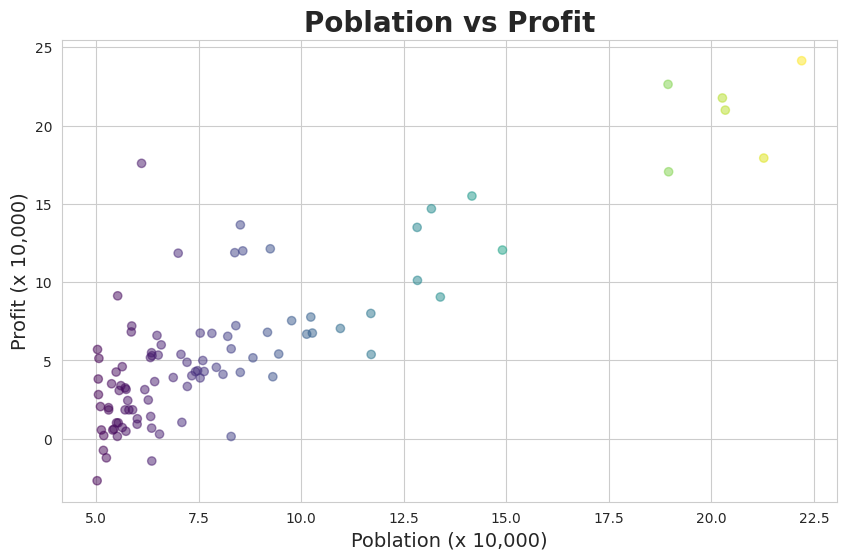

In [16]:
#Creamos un diagrama de dispersion (scatter plot) entre las columnas
#'poblationn' y 'profit'
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.scatter(df['poblation'], df['profit'], alpha=0.5, c=df['poblation'], cmap='viridis')
plt.xlabel('Poblation (x 10,000)', fontsize=14)
plt.ylabel('Profit (x 10,000)', fontsize=14)
plt.title('Poblation vs Profit', fontsize=20, fontweight='bold')
plt.show()


### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?

Es muy fuerte ya que se acerca considerablemente a el coeficiente 1 que es la correlacion perfecta.

- ¿Es positiva o negativa?

El valor del coeficiente correlacion es positiva, lo que nos indica que mientras la variable poblation crece, la variable profit tambien tienede a crecer.

- ¿Es coherente con el gráfico anterior?

Si ya que, como lo indicamos en la parte anterior del ejercicio, se nota que las variables tienden a tener una linealidad, puesto que entre mas grande sea la poblacion las ganancias tambien crecen.

In [17]:
#Hacemos el calculo de correlacion
corr = df['poblation'].corr(df['profit'])
#Imprimimos el coeficiente de correlacion
print(f'Coeficiente de correlacion: {corr}')


Coeficiente de correlacion: 0.837873232526341


## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?

El intercepto nos dice el valor de la variable 'profit' cuando la variable 'poblation' es 0, en este caso es negativo y se podria interpretar como que si la poblacion es 0, se tienen perdidas por costos de inversion, costos fijos, etc. (Puesto que no hay poblacion que compre en el restaurante)

4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

El coeficiente de la regresion o pendiente, nos indica como crece o decrece la variable 'profit' a medida que la variable 'poblation' crece, en este caso es postiva, lo cual nos inidica que las ganancias crecen a medida que la poblacion lo hace.

In [18]:
#Construimos un modelo de regresion lineal simple
model = LinearRegression()
model.fit(df[['poblation']], df['profit'])
#Imprimimos el intercepto y el coeficiente de la regresion (pendiente)
print(f'Intercepto: {model.intercept_}')
print(f'Coeficiente: {model.coef_[0]}')


Intercepto: -3.8957808783118484
Coeficiente: 1.1930336441895932


### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

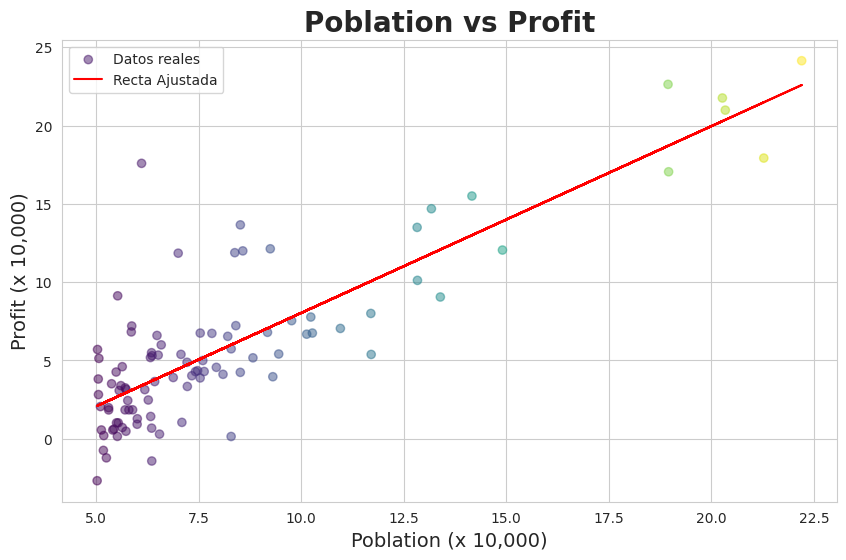

In [21]:
# Visualización del modelo ajustado
y_pred_ML = model.predict(df[['poblation']])
df['y_pred_ML'] = y_pred_ML

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.scatter(df['poblation'], df['profit'], alpha=0.5, c=df['poblation'], cmap='viridis', label = 'Datos reales')
plt.plot(df['poblation'], df['y_pred_ML'], color='red', label ='Recta Ajustada')
plt.xlabel('Poblation (x 10,000)', fontsize=14)
plt.ylabel('Profit (x 10,000)', fontsize=14)
plt.title('Poblation vs Profit', fontsize=20, fontweight='bold')
plt.legend()
plt.show()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?

No, los residuos no tienden a seguir una distribucion normal, parece mas que tienden a seguir una distribucion sesgada a la derecha.

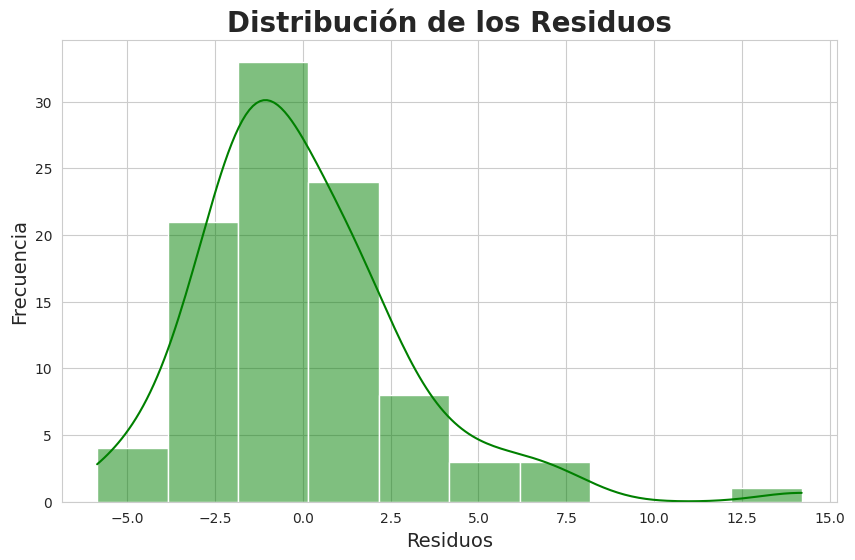

In [28]:
#Creamos la columna para los residuos
df['residuos'] = df['profit'] - df['y_pred_ML']
#Graficamos un histograma con KDE de los residuos.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x = 'residuos', bins=10, kde=True, color='green')
plt.xlabel('Residuos', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución de los Residuos', fontsize=20, fontweight='bold')
plt.show()

### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

Los residuos no muestran un patron, estos estan distribuidos aleaotriamente, porque lo que puede decirse que el modelo tiene homocedasticidad.

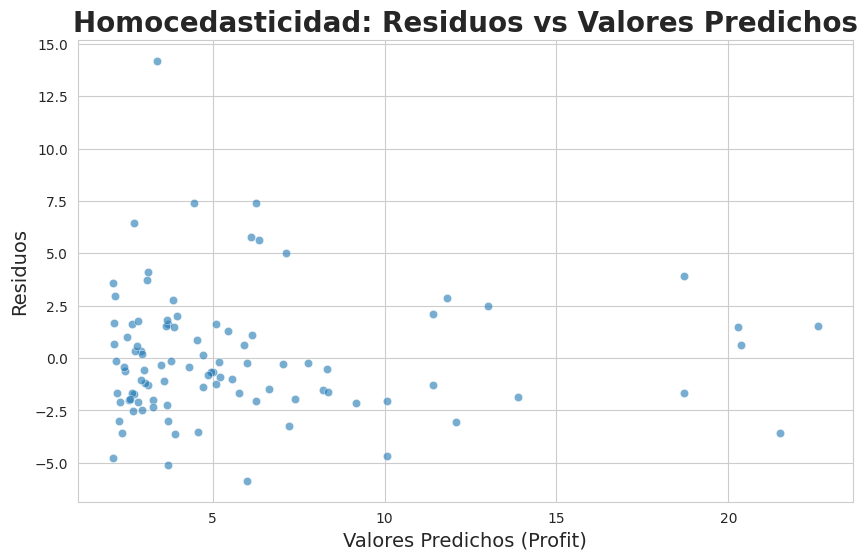

In [33]:
# Gráfico de residuos vs predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['y_pred_ML'], y=df['residuos'], alpha=0.6)
plt.xlabel('Valores Predichos (Profit)', fontsize=14)
plt.ylabel('Residuos', fontsize=14)
plt.title('Homocedasticidad: Residuos vs Valores Predichos', fontsize=20, fontweight='bold')
plt.show()

### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico:

  a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal

  Si la mayoria de los puntos tienden a seguir la linea diagonal, lo que inidica una distribucion normal de los errores.

  b) Desviaciones sistemáticas indican asimetría o colas pesadas.

  Notamos que los datos tienen tienen una cola pesada, lo que inidica que los valores extremos no siguen la distribucion normal, lo que a su vez no indicaria que tiene una kurtosis alta.

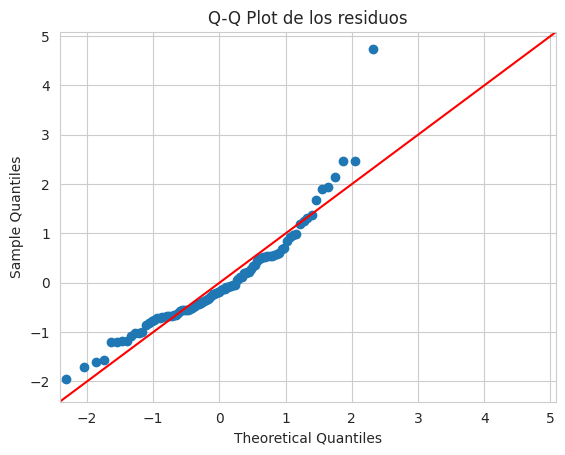

In [38]:
#Creamos un grafico de Q-Q Plot:
sm.qqplot(df['residuos'], line='45', fit=True)
plt.title('Q-Q Plot de los residuos')
plt.grid(True)
plt.show()

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

Nos dice que tomando en cuenta el RMSE, los datos del modelo se equivocan en casi 3 unidades al predecir 'profit' en base a los datos reales.
El valor de R^2 nos dice dice que el modelo solo nos explica el 30% de la variabilidad de los datos, lo que nos podria decir que hay otras variables o consideraciones que afectan 'profit' que no estamos considerando.

In [41]:
# Evaluación del modelo
#Error cuadratico medio (MSE)
mse = np.mean((df['profit']-df['y_pred_ML'])**2)
print(f'El error cuadratico medio es (MSE): {mse:.2f}')
#raiz del error cuadratico medio (RMSE)
rsme= np.sqrt(mse)
print(f'La raiz del error cuadratico medio es (RMSE): {rsme:.2f}')
#Coeficiente de determinacion (R^2)
y_media = df['profit'].mean()
sst = np.sum((df['profit']-y_media)**2)
ssr = np.sum((y_pred_ML-y_media)**2)
r2 = 1 - (ssr/sst)
print(f'El coeficiente de determinacion es (R^2): {r2:.2f}')

El error cuadratico medio es (MSE): 8.95
La raiz del error cuadratico medio es (RMSE): 2.99
El coeficiente de determinacion es (R^2): 0.30


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?

El modelo tiene bastante mejorabilidad, puesto que, al no ser completamente malo, tiende a acertar en algunas variables, pero no del todo.

- ¿Qué limitaciones encuentras?

Quiza la principal limitacion que encuentro es que al ser solo dependiente de una variable es algo dificl establecer un modelo muy preciso, normalmente las cosas dependen de varias variables y es por eso que no podemos predecir al 100% los valores de 'profit'

- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.

Si es necesario una ajusto de ambas variables puesto que su distribucion no es normal, se ve que tienenden a estar sesgados a su derecha.